# Importing the Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
from IPython.display import Image
import shutil
import os
from random import choice

# Cloning YoloV5 git Repo

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14607, done.
remote: Counting objects: 100% (161/161), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 14607 (delta 103), reused 145 (delta 95), pack-reused 14446
Receiving objects: 100% (14607/14607), 13.55 MiB | 18.38 MiB/s, done.
Resolving deltas: 100% (10080/10080), done.


In [ ]:
%cd /content/yolov5/

/content/yolov5


# Installing YoloV5 requirements files

In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 30.2 MB/s 


In [ ]:
# arrays to store file names
imgs = []
xmls = []

# setup directory names
train_path = "/content/drive/MyDrive/drone/train/images"
val_path = "/content/drive/MyDrive/drone/valid/images"
crs_path = "/content/drive/MyDrive/drone/images"

train_ratio = 0.8
val_ratio = 0.2

# total count of imgs
total_img_count = len(os.listdir(crs_path))/2

# sorting count of imgs
for (dirname,dirs, files) in os.walk(crs_path):
#     print(files)
    for filename in files:
#         print("hello")
        if filename.endswith(".txt"):
            xmls.append(filename)
        else:
            imgs.append(filename)

# counting range for cycles
count_for_train = int(len(imgs)*train_ratio)
count_for_val = int(len(imgs)*val_ratio)
print("training images are : ",count_for_train)
print("validation images are : ",count_for_val)

training images are :  112
validation images are :  28


In [ ]:
len(imgs)

140

In [ ]:
train_image_path = "/content/drive/MyDrive/drone/train/images"
train_label_path = "/content/drive/MyDrive/drone/train/labels"
val_image_path = "/content/drive/MyDrive/drone/valid/images"
val_label_path = "/content/drive/MyDrive/drone/valid/labels"

if not os.path.isdir(train_image_path):
    os.makedirs(train_image_path)
if not os.path.isdir(train_label_path):
    os.makedirs(train_label_path)
if not os.path.isdir(val_image_path):
    os.makedirs(val_image_path)
if not os.path.isdir(val_label_path):
    os.makedirs(val_label_path)

# cycle for train dir
for x in range(count_for_train):
    file_jpg = choice(imgs)
    file_xml = file_jpg[:-4] + ".txt"
    
    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(train_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(train_label_path,file_xml))
    
    imgs.remove(file_jpg)
    xmls.remove(file_xml)
    
# cycle for test dir
for x in range(count_for_val):
    file_jpg = choice(imgs)
    file_xml = file_jpg[:-4] + ".txt"
    
    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(val_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(val_label_path,file_xml))
    
    imgs.remove(file_jpg)
    xmls.remove(file_xml)

# rest of files
print("images length - ",len(imgs))
print(imgs,xmls)
for x in imgs:
    file_jpg = x
    file_xml = file_jpg[:-4] + ".txt"
    
    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(val_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(val_label_path,file_xml))
# shutil.copytree(crs_path,val_path)

images length -  0
[] []


# Downloading dataset.yaml file from google cloud for the dataset

In [ ]:
with open(r'/content/drive/MyDrive/drone/data.yaml', 'r') as file:
    lines = file.readlines()
    print(lines)

['train: /content/drive/MyDrive/drone/train/images\n', 'val: /content/drive/MyDrive/drone/valid/images\n', '\n', 'nc: 6\n', "names: ['3inch-Drone', '4inch-Drone', '5inch-Drone', 'DJI-FPV', 'DJI-Mini', 'DJI-Phantom']"]


# Training the YoloV5 model 

In [ ]:
!wandb disabled
!python train.py --img 415 --batch 16 --epochs 100 --data /content/drive/MyDrive/drone/data.yaml --weights yolov5s.pt --cache --workers 2

/bin/bash: wandb: command not found
train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/drone/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-228-g6ae3dff Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, 

In [ ]:
!zip -r /content/drive/MyDrive/drone/file.zip /content/yolov5

updating: content/yolov5/ (stored 0%)
updating: content/yolov5/tutorial.ipynb (deflated 78%)
updating: content/yolov5/.pre-commit-config.yaml (deflated 60%)
updating: content/yolov5/classify/ (stored 0%)
updating: content/yolov5/classify/predict.py (deflated 68%)
updating: content/yolov5/classify/train.py (deflated 66%)
updating: content/yolov5/classify/val.py (deflated 66%)
updating: content/yolov5/setup.cfg (deflated 44%)
updating: content/yolov5/__pycache__/ (stored 0%)
updating: content/yolov5/__pycache__/val.cpython-37.pyc (deflated 43%)
updating: content/yolov5/.gitattributes (deflated 4%)
updating: content/yolov5/benchmarks.py (deflated 68%)
updating: content/yolov5/utils/ (stored 0%)
updating: content/yolov5/utils/triton.py (deflated 67%)
updating: content/yolov5/utils/metrics.py (deflated 66%)
updating: content/yolov5/utils/autoanchor.py (deflated 60%)
updating: content/yolov5/utils/__pycache__/ (stored 0%)
updating: content/yolov5/utils/__pycache__/autoanchor.cpython-37.pyc (

# **DRNN**

In [2]:
import os
import collections
import pandas as pd
import numpy as np
import functools
import matplotlib.pyplot as plt
import cv2

from sklearn import preprocessing 


import xml.etree.ElementTree as ET

import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

import torch
import torchvision

from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator

from torch.utils.data import DataLoader, Dataset
from torch.utils.data import SequentialSampler

import glob
import cv2
from PIL import Image

In [3]:
BASE_PATH = "/content/drive/MyDrive/drone/dataset_xml_format/dataset_xml_format"
TXT_PATH = glob.glob("/content/drive/MyDrive/drone/drone_dataset_yolo/dataset_txt/*.txt")
IMG_PATH = glob.glob("/content/drive/MyDrive/drone/drone_dataset_yolo/dataset_txt/*.jpg")

In [4]:
train_image = []
train_image_path = []
train_image_id = []
train_annotation = []

In [5]:
def convert_format(box, iwidth = 256, iheight = 256):
    x = (iwidth*box[0]) - ((box[2]*iwidth)/2)
    y = (iheight*box[1]) - ((box[3]*iheight)/2)
    o_w = box[2]*iwidth
    o_h = box[3]*iheight
    return [x, y, o_w, o_h]

In [6]:
for i in IMG_PATH:     #slicing for insufficient memory
    Load_image = Image.open(i).convert('RGB')
    nmpy_img = Load_image.resize((258,258))
    train_image.append(np.asarray(nmpy_img))
    train_image_path.append(i)
    
    seperate_path = i.split('.')
    train_image_id.append(seperate_path[-2].split('/')[-1])
    
    seperate_path[1] = '.txt'
    with open(seperate_path[0]+seperate_path[1]) as f:
        lines = f.readlines()
        tmp_lst = lines[0].split(' ')
        #label = int(tmp_lst[0])
        startX = float(tmp_lst[1])
        startY = float(tmp_lst[2])
        endX = float(tmp_lst[3])
        endY = float(tmp_lst[4])
        
        train_annotation.append(convert_format([startX, startY, endX, endY]))

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


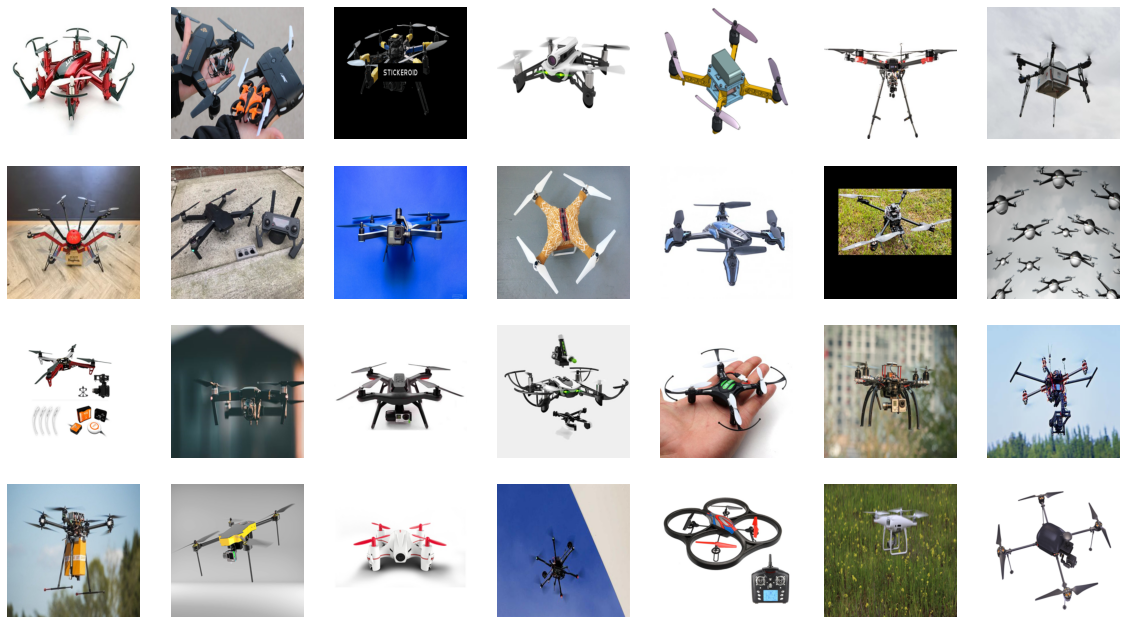

In [7]:
plt.figure(figsize=(20, 20))

for i in range(28):
    ax = plt.subplot(7, 7, i + 1)
    plt.imshow(train_image[i].astype("uint8"))
    plt.axis("off")

In [8]:
df = pd.DataFrame()

df['boxes'] = train_annotation
df['img_path'] = train_image_path
df['labels'] = 'drone'
df['img_id'] = train_image_id

df

,boxes,img_path,labels,img_id
0,"[11.775999999999996, 40.23846399999999, 236.54...",/content/drive/MyDrive/drone/drone_dataset_yol...,drone,pic_570
1,"[0.20006399999999758, 0.35558400000000745, 160...",/content/drive/MyDrive/drone/drone_dataset_yol...,drone,pic_612
2,"[21.494271999999995, 26.674943999999996, 211.0...",/content/drive/MyDrive/drone/drone_dataset_yol...,drone,pic_743
3,"[7.679999999999993, 53.970560000000006, 243.45...",/content/drive/MyDrive/drone/drone_dataset_yol...,drone,pic_497
4,"[4.0, 9.398527999999999, 244.8, 234.964992]",/content/drive/MyDrive/drone/drone_dataset_yol...,drone,pic_740
...,...,...,...,...
1354,"[88.44800000000001, 62.592, 72.448, 91.392]",/content/drive/MyDrive/drone/drone_dataset_yol...,drone,foto05685
1355,"[0.6400000000000006, 52.480000000000004, 255.2...",/content/drive/MyDrive/drone/drone_dataset_yol...,drone,pic_080
1356,"[9.856000000000009, 96.12800000000001, 243.968...",/content/drive/MyDrive/drone/drone_dataset_yol...,drone,pic_088
1357,"[53.58924800000001, 97.621504, 148.992, 66.673...",/content/drive/MyDrive/drone/drone_dataset_yol...,drone,pic_1043


In [9]:
# classes need to be in int form so we use LabelEncoder for this task
enc = preprocessing.LabelEncoder()
df['labels'] = enc.fit_transform(df['labels'])
df['labels'] = np.stack(df['labels'][i]+1 for i in range(len(df['labels']))) 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [10]:
df[['xmin','ymin','xmax','ymax']]=np.stack(df['boxes'][i] for i in range(len(df['boxes'])))

df.drop(columns=['boxes'], inplace=True)
df['xmin'] = df['xmin'].astype(np.float)
df['ymin'] = df['ymin'].astype(np.float)
df['xmax'] = df['xmax'].astype(np.float)
df['ymax'] = df['ymax'].astype(np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWar

In [11]:
df_removed_damaged = df.drop(df[(df.ymin > df.ymax) | (df.xmin > df.xmax)].index)

In [12]:
len(df_removed_damaged['img_id'].unique())

1042

In [13]:
train_ds = df_removed_damaged[0:750]
val_ds = df_removed_damaged[750:]
train_ds.shape, val_ds.shape

((750, 7), (292, 7))

In [14]:
class TrainDataset(Dataset):
    def __init__(self, dataframe, image_dir, transforms=None):
        super().__init__()
        
        self.image_ids = dataframe['img_id'].unique()
        self.df = dataframe
        self.image_dir = image_dir
        self.transforms = transforms
    
    def __getitem__(self, index: int):
        image_id = self.image_ids[index]
        records = self.df[self.df['img_id'] == image_id]
        image = cv2.imread(f'{self.image_dir}/{image_id}.jpg', cv2.IMREAD_COLOR)
        image = cv2.resize(image,(256,256))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
        image /= 255.0
        rows, cols = image.shape[:2]
        
        boxes = records[['xmin', 'ymin', 'xmax', 'ymax']].values
        
       
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        area = torch.as_tensor(area, dtype=torch.float32)
        
        label = records['labels'].values
        labels = torch.as_tensor(label, dtype=torch.int64)
        
        # suppose all instances are not crowd
        iscrowd = torch.zeros((records.shape[0],), dtype=torch.int64)
        
        target = {}
        target['boxes'] = boxes
        target['labels'] = labels
        # target['masks'] = None
        target['image_id'] = torch.tensor([index])
        target['area'] = area
        target['iscrowd'] = iscrowd
        
        if self.transforms:
            sample = {
                'image': image,
                'bboxes': target['boxes'],
                'labels': labels
            }
            sample = self.transforms(**sample)
            image = sample['image']
            
            target['boxes'] = torch.stack(tuple(map(torch.tensor, zip(*sample['bboxes'])))).permute(1,0)
            
            return image, target
        
    def __len__(self) -> int:
        return self.image_ids.shape[0]

In [15]:
def get_transform_train():
    return A.Compose([
        A.Flip(0.5),
        A.ShiftScaleRotate(scale_limit=0.1, rotate_limit=45, p=0.25),
        A.LongestMaxSize(max_size=800, p=1.0),

        # FasterRCNN will normalize.
        A.Normalize(mean=(0, 0, 0), std=(1, 1, 1), max_pixel_value=255.0, p=1.0),
        ToTensorV2(p=1.0)
    ], bbox_params={'format':'pascal_voc', 'label_fields': ['labels']})

def get_transform_valid():
    return A.Compose([
        ToTensorV2(p=1.0)
    ], bbox_params={'format': 'pascal_voc', 'label_fields':['labels']})

In [16]:
def collate_fn(batch):
    return tuple(zip(*batch))

train_dataset = TrainDataset(train_ds, '/content/drive/MyDrive/drone/drone_dataset_yolo/dataset_txt', get_transform_train())
valid_dataset = TrainDataset(val_ds, '/content/drive/MyDrive/drone/drone_dataset_yolo/dataset_txt', get_transform_valid())


train_data_loader = DataLoader(
    train_dataset,
    batch_size=16,
    shuffle=True,
    num_workers=4,
    collate_fn=collate_fn
)

valid_data_loader = DataLoader(
    valid_dataset,
    batch_size=4,
    shuffle=False,
    num_workers=4,
    collate_fn=collate_fn
)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [18]:
device

device(type='cuda')

In [19]:
images, targets= next(iter(train_data_loader))
images = list(image.to(device) for image in images)
targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

In [20]:
classes= {1:'drone'}

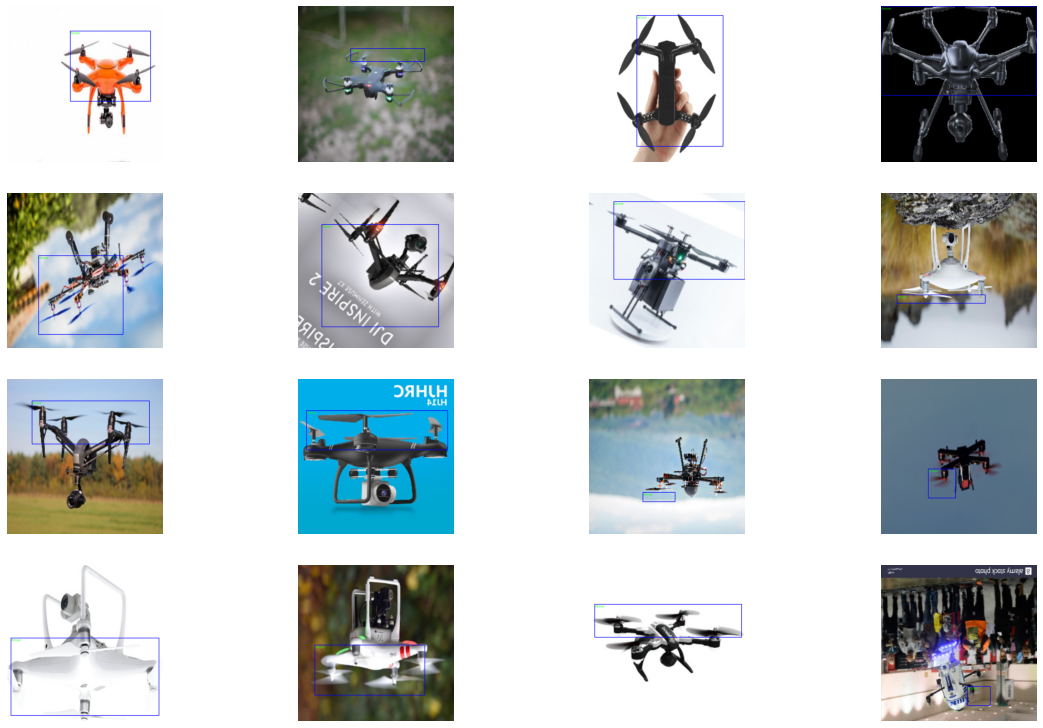

In [21]:
images, targets= next(iter(train_data_loader))
images = list(image.to(device) for image in images)
targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

plt.figure(figsize=(20,20))
for i, (image, target) in enumerate(zip(images, targets)):
    plt.subplot(6,4, i+1)
    boxes = targets[i]['boxes'].cpu().numpy().astype(np.int32)
    sample = images[i].permute(1,2,0).cpu().numpy() * 255
    names = targets[i]['labels'].cpu().numpy().astype(np.int64)
    for i,box in enumerate(boxes):
        cv2.rectangle(sample,
                      (box[0], box[1]),
                      (box[2], box[3]),
                      (0, 0, 220), 2)
        cv2.putText(sample, classes[names[i]], (box[0],box[1]+15),cv2.FONT_HERSHEY_COMPLEX ,0.5,(0,220,0),1,cv2.LINE_AA)  

    plt.axis('off')
    plt.imshow(sample)

In [22]:
# load a model; pre-trained on COCO
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

In [23]:
num_classes = 2

# get number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features

# replace the pre-trained head with a new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

In [24]:
model.to(device)
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, weight_decay=0.0005)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

In [25]:
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-4ca4lgvm
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-4ca4lgvm
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=265181 sha256=f7f48fff3b213a6ad4d9e6c1073a92acfa52b45aef70ba121d3ca50050f13e23
  Stored in directory: /tmp/pip-ephem-wheel-cache-8l8wjafu/wheels/e2/6b/1d/344ac773c7495ea0b85eb228bc66daec7400a143a92d36b7b1
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.6
    Uninstalling pycocotools-2.0.6:
      Successfully uninstalled pycocotools-2.0.6


In [26]:
!git clone https://github.com/pytorch/vision.git
    
!cd vision;cp references/detection/utils.py ../;cp references/detection/transforms.py ../;cp references/detection/coco_eval.py ../;cp references/detection/engine.py ../;cp references/detection/coco_utils.py ../

Cloning into 'vision'...
remote: Enumerating objects: 250766, done.
remote: Counting objects: 100% (3445/3445), done.
remote: Compressing objects: 100% (290/290), done.
remote: Total 250766 (delta 3192), reused 3356 (delta 3149), pack-reused 247321
Receiving objects: 100% (250766/250766), 507.06 MiB | 28.89 MiB/s, done.
Resolving deltas: 100% (228095/228095), done.


In [27]:
from engine import train_one_epoch, evaluate
import utils

In [28]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [29]:
# let's train it 
num_epochs = 2

for epoch in range(num_epochs):
    # train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, train_data_loader, device, epoch, print_freq=10)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    evaluate(model, valid_data_loader, device=device)

Epoch: [0]  [ 0/47]  eta: 0:10:22  lr: 0.000114  loss: 1.2114 (1.2114)  loss_classifier: 0.8309 (0.8309)  loss_box_reg: 0.1055 (0.1055)  loss_objectness: 0.2360 (0.2360)  loss_rpn_box_reg: 0.0390 (0.0390)  time: 13.2427  data: 3.1158  max mem: 11509
Epoch: [0]  [10/47]  eta: 0:02:13  lr: 0.001199  loss: 0.9214 (0.9916)  loss_classifier: 0.4699 (0.5022)  loss_box_reg: 0.0996 (0.0969)  loss_objectness: 0.2360 (0.3308)  loss_rpn_box_reg: 0.0421 (0.0618)  time: 3.6187  data: 0.3499  max mem: 11612
Epoch: [0]  [20/47]  eta: 0:01:24  lr: 0.002285  loss: 0.5839 (0.7634)  loss_classifier: 0.1664 (0.3282)  loss_box_reg: 0.0957 (0.0957)  loss_objectness: 0.1638 (0.2773)  loss_rpn_box_reg: 0.0421 (0.0622)  time: 2.6369  data: 0.0713  max mem: 11612
Epoch: [0]  [30/47]  eta: 0:00:50  lr: 0.003371  loss: 0.3685 (0.6243)  loss_classifier: 0.1143 (0.2535)  loss_box_reg: 0.0930 (0.0933)  loss_objectness: 0.1063 (0.2167)  loss_rpn_box_reg: 0.0420 (0.0608)  time: 2.6374  data: 0.0675  max mem: 11612
Epo

In [30]:
torch.save(model.state_dict(), '/content/drive/MyDrive/drone/faster_rcnn_state.pth')

In [31]:
# load  a model; pre-trained on COCO
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=False, pretrained_backbone=False)

WEIGHTS_FILE = "/content/drive/MyDrive/drone/faster_rcnn_state.pth"

num_classes = 2

# get number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features

# replace the pre-trained head with a new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

# Load the traines weights
model.load_state_dict(torch.load(WEIGHTS_FILE))

model = model.to(device)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained_backbone' is deprecated since 0.13 and will be removed in 0.15, please use 'weights_backbone' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights_backbone' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights_backbone=None`.
  warnings.warn(msg)


In [32]:
def obj_detector(img):
    img = cv2.imread(img, cv2.IMREAD_COLOR)
    #img - cv2.resize(img,(256,256))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)

    img /= 255.0
    img = torch.from_numpy(img)
    img = img.unsqueeze(0)
    img = img.permute(0,3,1,2)
    
    model.eval()

    detection_threshold = 0.35
    
    img = list(im.to(device) for im in img)
    output = model(img)

    for i , im in enumerate(img):
        boxes = output[i]['boxes'].data.cpu().numpy()
        scores = output[i]['scores'].data.cpu().numpy()
        labels = output[i]['labels'].data.cpu().numpy()

        labels = labels[scores >= detection_threshold]
        boxes = boxes[scores >= detection_threshold].astype(np.int32)
        scores = scores[scores >= detection_threshold]

        boxes[:, 2] = boxes[:, 2] - boxes[:, 0]
        boxes[:, 3] = boxes[:, 3] - boxes[:, 1]
    
    sample = img[0].permute(1,2,0).cpu().numpy()
    sample = np.array(sample)
    boxes = output[0]['boxes'].data.cpu().numpy()
    name = output[0]['labels'].data.cpu().numpy()
    scores = output[0]['scores'].data.cpu().numpy()
    boxes = boxes[scores >= detection_threshold].astype(np.int32)
    names = name.tolist()
    
    #print(names, boxes, sample)
    return names, boxes, sample

In [33]:
pred_files = glob.glob("/content/drive/MyDrive/drone/drone_dataset_yolo/dataset_txt/*.jpg")

plt.figure(figsize=(20,80))
for i, images in enumerate(pred_files):
    if i > 19:break
    plt.subplot(10,2,i+1)
    names,boxes,sample = obj_detector(images)
    for i,box in enumerate(boxes):
        cv2.rectangle(sample,
                      (box[0], box[1]),
                      (box[2], box[3]),
                      (0, 220, 0), 2)
        cv2.putText(sample, classes[names[i]], (box[0],box[1]-5),cv2.FONT_HERSHEY_COMPLEX ,0.7,(220,0,0),2,cv2.LINE_AA)  

    plt.axis('off')
    plt.imshow(sample)
#     plt.savefig('save_image.png', bbox_inches='tight')  # if you want to save result

Output hidden; open in https://colab.research.google.com to view.